In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
from datasets import load_dataset
#hello


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
df['job_skills'] = df['job_skills'].apply(lambda skill_li: ast.literal_eval(skill_li) if pd.notna(skill_li) else skill_li)


In [58]:
df_us = df[df['job_country'] == 'India'] 

df_skills = df_us.explode('job_skills')


In [59]:
df_skill_count =df_skills.groupby(['job_skills' , 'job_title_short']).size()

df_skill_count = df_skill_count.reset_index(name='skill_count')

df_skill_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,19
1,airflow,Cloud Engineer,29
2,airflow,Data Analyst,89
3,airflow,Data Engineer,2990
4,airflow,Data Scientist,327
...,...,...,...
1684,zoom,Data Scientist,32
1685,zoom,Senior Data Analyst,1
1686,zoom,Senior Data Engineer,14
1687,zoom,Senior Data Scientist,4


In [60]:
df_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [61]:
job_titles = df_skill_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

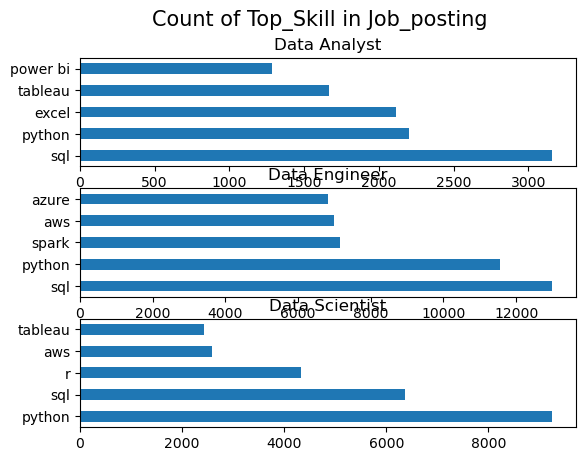

In [64]:
fig, ax =plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):

    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5) 
    df_plot.plot(kind='barh',y='skill_count',x='job_skills',ax=ax[i],title =job_title)
    ax[i].invert_yaxis
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top_Skill in Job_posting', fontsize=15)

plt.show()

In [67]:
df_job_title_count = df_us ['job_title_short'].value_counts().reset_index(name='job_total')

df_job_title_count

,job_title_short,job_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [71]:
df_skill_perc = pd.merge(df_skill_count,df_job_title_count,how='left', on='job_title_short') 

df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count']/ df_skill_perc['job_total']

df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


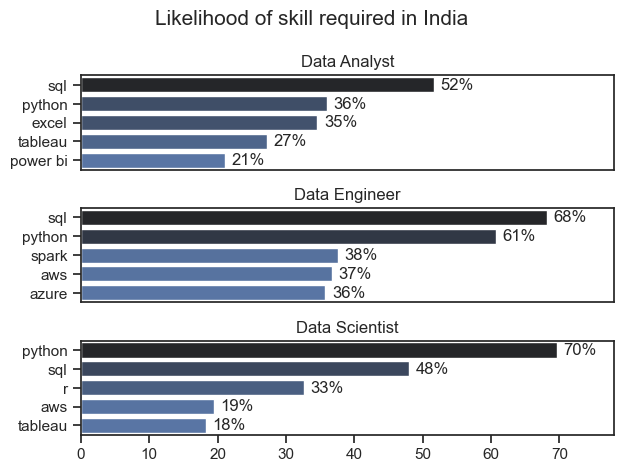

In [88]:
fig, ax =plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):

    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5) 
    # df_plot.plot(kind='barh',y='skill_percent',x='job_skills',ax=ax[i],title =job_title)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v +1 , n, f'{v:.0f}%', va='center' )

    if i!= len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skill required in India', fontsize=15)
fig.tight_layout()
plt.show()